# Version-3

### Change1 - Dropout
Added dropout layer after every transition block
- Dropout 0.10 - 99.18% (11th epoch)
- Dropout 0.20 - 99.36% (25th epoch)
- Dropout 0.30 - 99.32% (21st epoch)

### Change2 - Dropout after every layer
- Tried adding dropout fater every layer but got the accuracy of 99.28%
- After removing few dropout layers, got the acuracy of 99.30 %


Summary:
- Dropout after every transition block worked effectively
- Dropout increses the validation accuracy from 99.07% to 99.36%

---


### Install Dependencies 

- To train the following network, we use a framework named Keras.
- Keras provides functions for Convolution layers, Activation layers, MaxPooling layer, etc. so we don't need write code for designing such layers. Instead we can focus on creating better network architecture
- Following lines of code installs Keras on the system

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Import Libraries and Modules

In [0]:
# Import Numpy for matrices and multi-dimensional array's processing
import numpy as np

# Import Sequential to write model layer-by-layer in sequence 
from keras.models import Sequential

# Import Flatten layer to flatten feature-map, Dropout to avoid overfitting
from keras.layers import Flatten, Dropout, Activation, BatchNormalization

# Import Convolution layer to perform convolution on the channels, MaxPooling to reduce dimensions of channel
from keras.layers import Convolution2D, MaxPooling2D

# Import np_utils for one-hot-encoding
from keras.utils import np_utils

# Import hand written dataset of numbers from 0-9
from keras.datasets import mnist

### Load the Data
The data is loaded in following variables:

- X_train: Samples used during training the network
- y_train: Corresponding labels for training data
- X_test: Samples used for validation after training the network
- y_test: Corresponding labels for the validation of network's performance

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Dataset Information and Display Data Sample
- We have 60000 images in training dataset
- We have 10000 images in the testing dataset
- Each image's dimension are 28x28x1

(60000, 28, 28)
(10000, 28, 28)


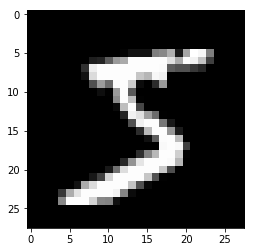

In [0]:
# Dimensions of the training dataset images
print (X_train.shape)

# Dimensions of the testing dataset images
print (X_test.shape)

# Import python module for plotting the image
from matplotlib import pyplot as plt

# Below line is written to display an image in this notebook
%matplotlib inline

# Plotting first image in the training dataset
# cmap='gray' displays the data sample in appropriate color space
plt.imshow(X_train[0], cmap='gray')

### Reshape the dataset
- Keras requires the input data in a form of 4D tensor
- The first value represents the total number of images in a training/testing dataset
- Second and third values are dimensions of an image
- Fourth value is the number of channels (1 for grayscale and 3 for RGB)  

Thus, the X_train will have a shape of (60000, 28, 28, 1)  
and the X_test will have a shape of (1000, 28, 28, 1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the Data
- When a Kernel is convolved over an input image, the maximum pixel value in the feature-map depends upon the maximum pixel value in the kernel
- Different kernels will have different maximum values and so their corresponding feature-maps will have different maximum values
- The feature-map with greater maximum pixel value will be louder while training the network
- To avoid biased activations of such kernels, we perform Normalization
- For normalization, we first convert the data into float so that we can get all the decimal values
- By dividing all the pixels by 255, all the pixel values will be restricted between 0.0 to 1.0. This is how we normalize the data.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Print Labels

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### One-Hot Encoding
- It is way of representing labels
- Instead of using one-single scalar for labels, we use a vector to represent the labels.
- The position of the ground-truth is marked as 1 while other positions are marked as 0
- The network cannot print out the prediction as 0,1,2,....9
- Instead it can activate the neuron associated with these numbers. So, the last layer before activation layer has number of neurons equal to number of classes (in this case 10)
- The neuron associated with the number is set as 1 while other neurons are set as 0. Following is the pattern in which encoding is done:  
  - Number 0 is encoded as 1000000000  
  - Number 1 is encoded as 0100000000  
  - Number 2 is encoded as 0010000000  
   .  
   .  
   .  
   .  
  - Number 9 is encoded as 0000000001

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Print Labels after one-hot encoding

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Model Architecture

- Model is defined sequential
- The model has convolution, maxpooling, flatten and softmax layers

- **Convolution Layer:**
  - It is a process of extracting features from a channel using a kernel (feature extractor)
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/5-3ConvolutionSmall.gif?raw=true)

- **MaxPooling Layer:**
  - It reduces the dimension of an channel. If we use MaxPooling of 2x2, dimension of an channel will become half of input channel
  - It only passes the louder pixel value in the next layer
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%203/Files/maxpool.gif?raw=true)

- **Softmax Layer:**
  - It is like probability
  - It gives score of a class between 0 and 1
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/softmax.png?raw=true)

- **Flatten Layer:**
  - It flattens the input dimension
  - Multiple 2D channels are converted into a vector 

### Dropout after Transition Block

In [0]:
# For reproducable results
np.random.seed(7)

drop = 0.2

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1'))   # Layer 1: Input:28x28x01  |  Kernels:(3x3x01)x10  |  Output:26x26x10  |  Receptive Field:3x3 
model.add(BatchNormalization())                                                               # Layer 2: Batch Normalization
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_2'))                          # Layer 3: Input:26x26x10  |  Kernels:(3x3x10)x10  |  Output:24x24x10  |  Receptive Field:5x5  
model.add(BatchNormalization())                                                               # Layer 4: Batch Normalization
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_3'))                          # Layer 5: Input:24x24x64  |  Kernels:(3x3x10)x12  |  Output:22x22x12  |  Receptive Field:7x7
model.add(BatchNormalization())                                                               # Layer 6: Batch Normalization

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_4_1x1'))                      # Layer 7: Input:22x22x12  |  Kernels:(1x1x12)x10  |  Output:22x22x10  |  Receptive Field:7x7 
model.add(MaxPooling2D(2, name='MP'))                                                         # Layer 8: Input:22x22x10  |    MaxPooling:(2x2)   |  Output:11x11x10  |  Receptive Field:14x14 
model.add(BatchNormalization())                                                               # Layer 9: Batch Normalization
model.add(Dropout(drop))                                                                      # Layer 10: Dropout Layer

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_5'))                          # Layer 11: Input:11x11x10  |  Kernels:(3x3x10)x10  |  Output:9x9x10  |  Receptive Field:16x16 
model.add(BatchNormalization())                                                               # Layer 12: Batch Normalization
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_6'))                          # Layer 13: Input:09x09x10  |  Kernels:(3x3x10)x10  |  Output:7x7x10  |  Receptive Field:18x18 
model.add(BatchNormalization())                                                               # Layer 14: Batch Normalization
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_7'))                          # Layer 15: Input:07x07x10  |  Kernels:(3x3x10)x12  |  Output:5x5x12  |  Receptive Field:20x20 
model.add(BatchNormalization())                                                               # Layer 16: Batch Normalization

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_8_1x1'))                      # Layer 17: Input:5x5x12    |  Kernels:(1x1x12)x10  |  Output:5x5x10  |  Receptive Field:22x22
model.add(BatchNormalization())                                                               # Layer 18: Batch Normalization
model.add(Dropout(drop))                                                                      # Layer 19: Dropout Layer

# Output Block
model.add(Convolution2D(10, 5, name='conv_9'))                                                # Layer 20: Input:5x5x10   |  Kernels:(5x5x10)x10  |  Output:1x1x10  |  Receptive Field:27x27 
model.add(Flatten())                                                                          # Layer 21: Input:1x1x10   |  Output:10
model.add(Activation('softmax'))                                                              # Layer 22: Activation Layer

# Summaries above architecture
# model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_2")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="conv_3")`
  del sys.path[0]


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_4_1x1")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_5")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_6")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="conv_7")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_8_1x1")`


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 25s 413us/step - loss: 0.3655 - acc: 0.8819 - val_loss: 0.0819 - val_acc: 0.9738
Epoch 2/25
60000/60000 [==============================] - 21s 358us/step - loss: 0.0962 - acc: 0.9701 - val_loss: 0.0576 - val_acc: 0.9809
Epoch 3/25
60000/60000 [==============================] - 21s 353us/step - loss: 0.0700 - acc: 0.9779 - val_loss: 0.0456 - val_acc: 0.9850
Epoch 4/25
60000/60000 [==============================] - 21s 355us/step - loss: 0.0590 - acc: 0.9815 - val_loss: 0.0365 - val_acc: 0.9882
Epoch 5/25
60000/60000 [==============================] - 21s 355us/step - loss: 0.0512 - acc: 0.9843 - val_loss: 0.0343 - val_acc: 0.9890
Epoch 6/25
60000/60000 [==============================] - 21s 353us/step - loss: 0.0488 - acc: 0.9843 - val_loss: 0.0336 - val_acc: 0.9891
Epoch 7/25
60000/60000 [==============================] - 21s 353us/

---
### Dropout after every convoltion layer

In [0]:
# For reproducable results
np.random.seed(7)

drop = 0.2

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1'))   
model.add(BatchNormalization())
model.add(Dropout(drop))
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_2'))                          
model.add(BatchNormalization())
model.add(Dropout(drop))
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_3'))                         
model.add(BatchNormalization())
model.add(Dropout(drop))

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_4_1x1'))                     
model.add(MaxPooling2D(2, name='MP'))                                                        
model.add(BatchNormalization())
model.add(Dropout(drop))

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_5'))                         
model.add(BatchNormalization())
model.add(Dropout(drop))
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_6'))                         
model.add(BatchNormalization())
model.add(Dropout(drop))
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_7'))                         
model.add(BatchNormalization())
model.add(Dropout(drop))

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_8_1x1'))                     
model.add(BatchNormalization())
model.add(Dropout(drop))

# Output Block
model.add(Convolution2D(10, 5, name='conv_9'))                                               
model.add(Flatten())                                                                         
model.add(Activation('softmax'))                                                             

# Summaries above architecture
# model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_2")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="conv_3")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_4_1x1")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 25s 425us/step - loss: 0.5423 - acc: 0.8226 - val_loss: 0.1670 - val_acc: 0.9485
Epoch 2/25
60000/60000 [==============================] - 24s 393us/step - loss: 0.1723 - acc: 0.9461 - val_loss: 0.0784 - val_acc: 0.9763
Epoch 3/25
60000/60000 [==============================] - 24s 392us/step - loss: 0.1322 - acc: 0.9590 - val_loss: 0.0674 - val_acc: 0.9791
Epoch 4/25
60000/60000 [==============================] - 24s 392us/step - loss: 0.1086 - acc: 0.9661 - val_loss: 0.0813 - val_acc: 0.9750
Epoch 5/25
60000/60000 [==============================] - 24s 393us/step - loss: 0.1015 - acc: 0.9688 - val_loss: 0.0547 - val_acc: 0.9820
Epoch 6/25
60000/60000 [==============================] - 23s 391us/step - loss: 0.0923 - acc: 0.9717 - val_loss: 0.0523 - val_acc: 0.9835
Epoch 7/25
60000/60000 [==============================] - 24s 392us/step - loss: 0.0859 - acc: 0.9734 - val_loss: 0.

---
### Dropout in only convolution block

In [0]:
# For reproducable results
np.random.seed(7)

drop = 0.2

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1'))   
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_2'))                            
model.add(BatchNormalization())
model.add(Dropout(drop))
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_3'))                         
model.add(BatchNormalization())


# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_4_1x1'))                       
model.add(MaxPooling2D(2, name='MP'))                                                         
model.add(BatchNormalization())


# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_5'))                           
model.add(BatchNormalization())
model.add(Dropout(drop))
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_6'))                         
model.add(BatchNormalization())
model.add(Dropout(drop))
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_7'))                         
model.add(BatchNormalization())


# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_8_1x1'))                      
model.add(BatchNormalization())


# Output Block
model.add(Convolution2D(10, 5, name='conv_9'))                                                
model.add(Flatten())                                                                          
model.add(Activation('softmax'))                                                              

# Summaries above architecture
# model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_2")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="conv_3")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_4_1x1")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 25s 419us/step - loss: 0.3865 - acc: 0.8785 - val_loss: 0.0947 - val_acc: 0.9695
Epoch 2/25
60000/60000 [==============================] - 22s 368us/step - loss: 0.1084 - acc: 0.9665 - val_loss: 0.0605 - val_acc: 0.9800
Epoch 3/25
60000/60000 [==============================] - 22s 368us/step - loss: 0.0796 - acc: 0.9750 - val_loss: 0.0472 - val_acc: 0.9842
Epoch 4/25
60000/60000 [==============================] - 22s 368us/step - loss: 0.0665 - acc: 0.9789 - val_loss: 0.0456 - val_acc: 0.9851
Epoch 5/25
60000/60000 [==============================] - 22s 369us/step - loss: 0.0609 - acc: 0.9808 - val_loss: 0.0338 - val_acc: 0.9896
Epoch 6/25
60000/60000 [==============================] - 22s 368us/step - loss: 0.0553 - acc: 0.9830 - val_loss: 0.0332 - val_acc: 0.9902
Epoch 7/25
60000/60000 [==============================] - 22s 368us/step - loss: 0.0490 - acc: 0.9846 - val_loss: 0.